In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_florence_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('florence')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/florence_{date}.csv',index=False)
get_listings_florence_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_florence = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_florence)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(florence_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 10548 AirBnb listings.


In [4]:
florence_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2020-12.csv')
florence_raw_df_12_12_2020.shape


(11632, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for florence
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_florence = glob.glob('florence/**.csv')
files_florence

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['florence/Florence_2021-09.csv',
 'florence/Florence_2021-08.csv',
 'florence/Florence_2020-12.csv',
 'florence/Florence_2021-06.csv',
 'florence/Florence_2021-07.csv',
 'florence/Florence_2021-04.csv',
 'florence/Florence_2021-10.csv',
 'florence/Florence_2021-01.csv',
 'florence/Florence_2021-03.csv',
 'florence/Florence_2021-02.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

florence_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(florence_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(florence_raw_df_12_12_2020['price'].mean(),2)}.")

florence_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(florence_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_1_9_2021['price'].mean(),2)}.")

florence_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(florence_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_2_8_2021['price'].mean(),2)}.")

florence_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(florence_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_3_4_2021['price'].mean(),2)}.")

florence_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(florence_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_4_9_2021['price'].mean(),2)}.")

#florence_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(florence_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_5_19_2021['price'].mean(),2)}.")

florence_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(florence_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_6_3_2021['price'].mean(),2)}.")

florence_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(florence_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_7_4_2021['price'].mean(),2)}.")

florence_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(florence_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_8_6_2021['price'].mean(),2)}.")

florence_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(florence_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_9_7_2021['price'].mean(),2)}.")

florence_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(florence_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_10_6_2021['price'].mean(),2)}.")

#florence_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(florence_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 11632 AirBnb listings; the avg price is €112.77.
The 1_9_2021 dataset contains 11527 AirBnb listings; the avg price is €103.19.
The 2_8_2021 dataset contains 11436 AirBnb listings; the avg price is €103.06.
The 3_4_2021 dataset contains 11322 AirBnb listings; the avg price is €105.43.
The 4_9_2021 dataset contains 11311 AirBnb listings; the avg price is €110.93.
The 6_3_2021 dataset contains 11209 AirBnb listings; the avg price is €121.39.
The 7_4_2021 dataset contains 11364 AirBnb listings; the avg price is €123.61.
The 8_6_2021 dataset contains 11035 AirBnb listings; the avg price is €125.61.
The 9_7_2021 dataset contains 10793 AirBnb listings; the avg price is €122.85.
The 10_6_2021 dataset contains 10548 AirBnb listings; the avg price is €123.17.


In [7]:
df_list_florence = [florence_raw_df_12_12_2020, florence_raw_df_1_9_2021, florence_raw_df_2_8_2021,
           florence_raw_df_3_4_2021, florence_raw_df_4_9_2021, florence_raw_df_6_3_2021, florence_raw_df_7_4_2021,
           florence_raw_df_8_6_2021, florence_raw_df_9_7_2021, florence_raw_df_10_6_2021]

dates_florence = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_florence = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_florence = []

def airbnb_parse_florence(df_list, files):
    for file in files_florence:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/florence/florence_{file}.csv")
        print(f"The {file} florence dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_florence(df_list, dates):
    for file in files_florence:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/florence/florence_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_florence.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_florence)

florence_parse = airbnb_parse_florence(df_list_florence, files_florence)


The 2020-12 florence dataset contains 11632 AirBnb listings -- the avg price is €112.77.
The 2021-01 florence dataset contains 11527 AirBnb listings -- the avg price is €103.19.
The 2021-02 florence dataset contains 11436 AirBnb listings -- the avg price is €103.06.
The 2021-03 florence dataset contains 11322 AirBnb listings -- the avg price is €105.43.
The 2021-04 florence dataset contains 11311 AirBnb listings -- the avg price is €110.93.
The 2021-06 florence dataset contains 11209 AirBnb listings -- the avg price is €121.39.
The 2021-07 florence dataset contains 11364 AirBnb listings -- the avg price is €123.61.
The 2021-08 florence dataset contains 11035 AirBnb listings -- the avg price is €125.61.
The 2021-09 florence dataset contains 10793 AirBnb listings -- the avg price is €122.85.
The 2021-10 florence dataset contains 10548 AirBnb listings -- the avg price is €123.17.


In [8]:
florence_summary = airbnb_to_frame_florence(df_list_florence, files_florence)
florence_summary['Date of scrape'] = pd.to_datetime(florence_summary['Date of scrape'])
florence_summary['City'] = 'Florence'

dfi.export(florence_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/airbnb_florence_summary.png")


In [9]:
master_df_florence = pd.concat(df_list_florence)
master_df_florence_unique = master_df_florence.drop_duplicates(subset='id')
master_df_florence_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78210,11.24392,Entire home/apt,70,2,1,2019-09-27,0.07,4,0,NaN,NaN
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,70,2,3,2019-04-21,0.02,4,365,NaN,NaN
2,24471,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,135,2,0,NaN,NaN,4,365,NaN,NaN
3,24472,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,120,2,2,2012-04-11,0.02,4,1,NaN,NaN
4,31840,A Residenza Martin Classic room,380378,Officina 360,NaN,Centro Storico,43.77709,11.25216,Private room,35,1,119,2020-10-09,0.93,27,111,NaN,NaN


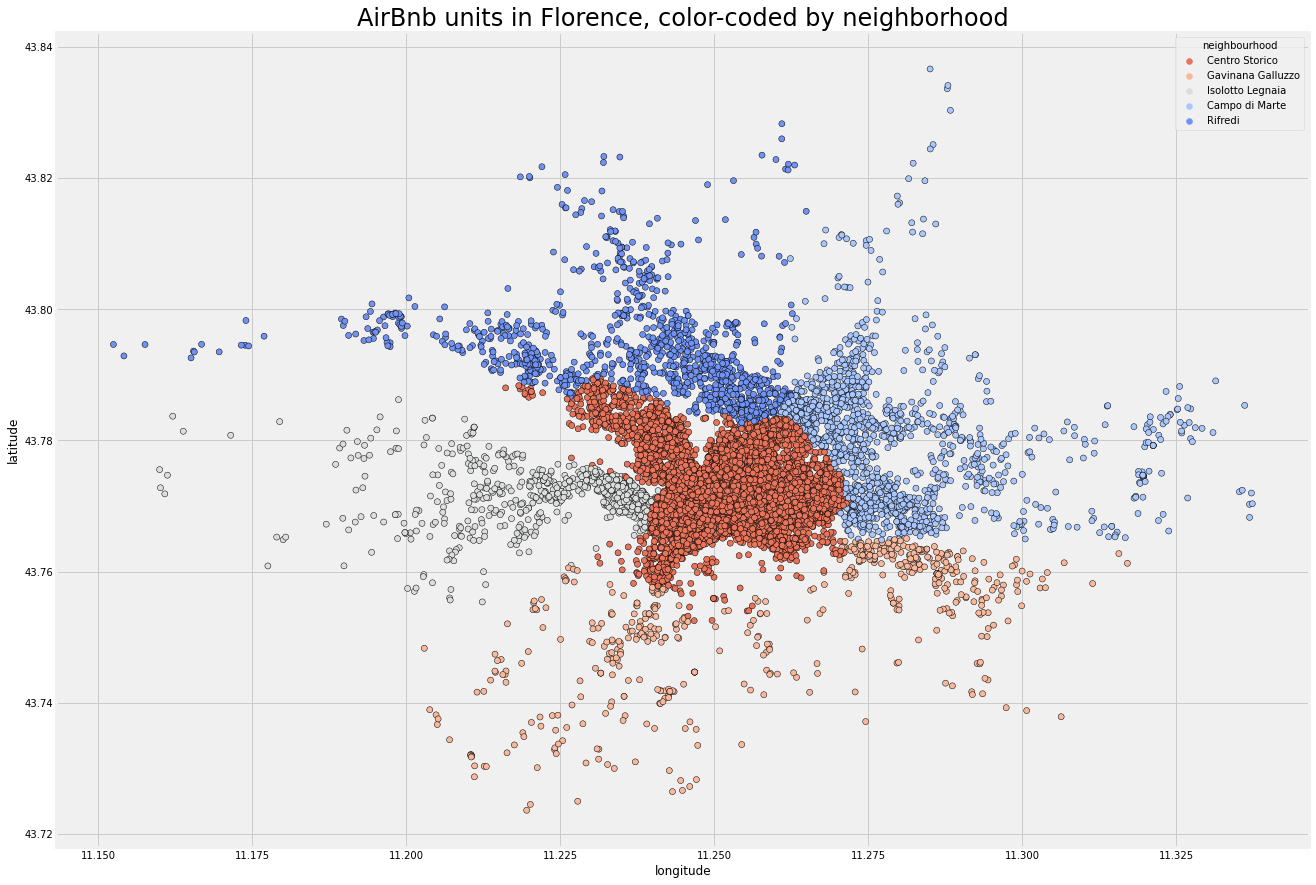

In [10]:
title = 'AirBnb units in Florence, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_florence_unique.longitude, master_df_florence_unique.latitude, hue = master_df_florence_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/airbnb_florence_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([florence_raw_df_10_6_2021,raw_df_florence],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2    3231
4    3212
3    1168
6    1134
5     761
1     344
0       1
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -75.07185384816236
Coefficients:  [ 15.34788811  18.42127347  -0.51737537   0.36199837  -6.39751866
 -45.7277277   55.64997258  46.21604676 -31.04549486]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


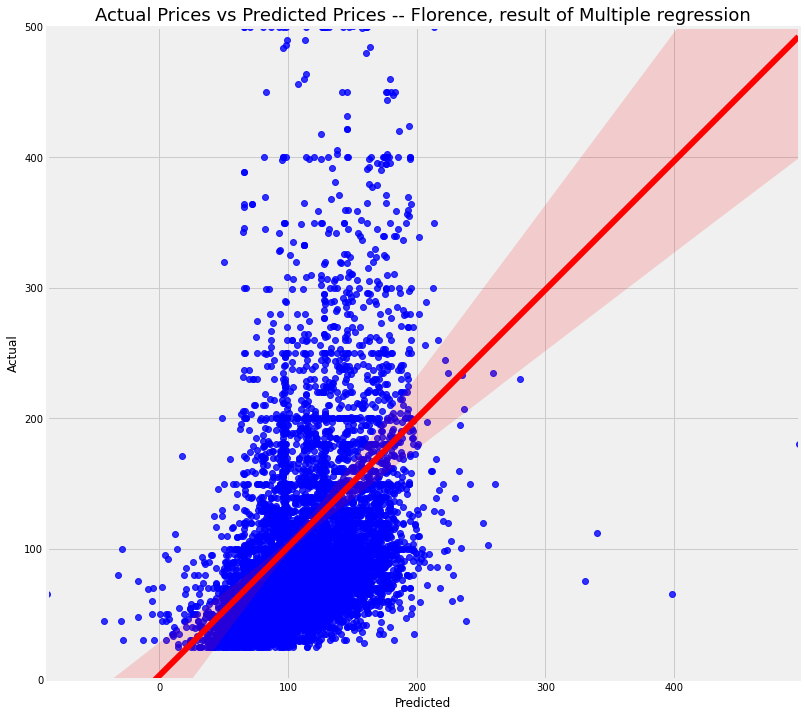

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Florence, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/airbnb_florence_multiple_regression.png')



In [19]:
df_result.shape

(9217, 3)

## The most mispriced [undervalued]

In [20]:
florence_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
florence_mispriced['%'] = (florence_mispriced['Actual']/ florence_mispriced['Predicted'] -1) *100
florence_mispriced_perc = florence_mispriced.sort_values(by=['%'], ascending=True)
florence_mispriced_perc_plot = florence_mispriced_perc.loc[(florence_mispriced_perc['Predicted']>=1) & (florence_mispriced_perc['Diff']>= 1)]
florence_mispriced_perc_plot = florence_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
florence_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
8346,65,398.564256,333.564256,-83.691463
6297,30,182.645326,152.645326,-83.574723
10030,28,158.658850,130.658850,-82.352072
1456,35,197.519670,162.519670,-82.280246
10308,45,238.627380,193.627380,-81.142147


In [21]:

florence_mispriced_1 = raw_df_florence.loc[raw_df_florence.id==827]
florence_mispriced_2 = raw_df_florence.loc[raw_df_florence.id==748]
florence_mispriced_3 = raw_df_florence.loc[raw_df_florence.index==1308]
florence_mispriced_4 = raw_df_florence.loc[raw_df_florence.index==1748]
florence_mispriced_5 = raw_df_florence.loc[raw_df_florence.index==894]

In [22]:
id_array = [8346, 6297, 10030, 1456, 10308]

florence_mispriced_query = raw_df_florence.query('index in @id_array')
florence_mispriced_query = florence_mispriced_query.rename({'index': 'id'}, axis=1)
florence_mispriced_query.shape
#florence_mispriced_query.head(1)

(5, 74)

In [23]:
#florence_mispriced_neg = raw_df_florence.loc[raw_df_florence.index==4119]
florence_mispriced_perc_1 = raw_df_florence.loc[raw_df_florence.id==7125]
florence_mispriced_perc_2 = raw_df_florence.loc[raw_df_florence.id==3679]
florence_mispriced_perc_3 = raw_df_florence.loc[raw_df_florence.id==8267]
florence_mispriced_perc_4 = raw_df_florence.loc[raw_df_florence.id==2483]
florence_mispriced_perc_5 = raw_df_florence.loc[raw_df_florence.id==3449]

In [24]:
florence_mispriced = florence_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
florence_mispriced_1 = florence_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

florence_mispriced_1[:1]
florence_mispriced_1[:2]
florence_mispriced_1[:3]
florence_mispriced_1[:4]
florence_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
1456,4953667,$35.00,3.5,3.5,3.5,4.5,4.5,4.0,"Scandicci, Toscana, Italy",https://www.airbnb.com/rooms/4953667
6297,29703289,$30.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/29703289
8346,40894375,$65.00,2.0,1.0,5.0,5.0,5.0,1.0,NaN,https://www.airbnb.com/rooms/40894375
10030,50988558,$28.00,5.0,5.0,5.0,5.0,5.0,5.0,NaN,https://www.airbnb.com/rooms/50988558
10308,51915621,$45.00,3.0,2.0,4.0,4.0,5.0,3.0,"Florence, Toscana, Italy",https://www.airbnb.com/rooms/51915621


In [25]:
dfi.export(florence_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/airbnb_florence_mispriced.png")



## The best score

In [26]:
florence_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
florence_high_value.head(6)

,Actual,Predicted,Diff
9159,180,496.517961,316.517961
8346,65,398.564256,333.564256
7679,6999,388.426497,-6610.573503
4767,112,340.379341,228.379341
7284,75,330.882372,255.882372
8815,230,280.583739,50.583739


In [27]:
id_array = [9159, 8346, 7679, 4767, 7284]

florence_best_score_query = raw_df_florence.query('index in @id_array')
florence_best_score_query = florence_best_score_query.rename({'index': 'id'}, axis=1)
#florence_best_score_query.head(1)

In [28]:
florence_best_score = florence_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
florence_best_score_1 = florence_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

florence_best_score_1[:1]
florence_best_score_1[:2]
florence_best_score_1[:3]
florence_best_score_1[:4]
florence_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
4767,21655625,$112.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/21655625
7284,34944137,$75.00,2.0,1.0,3.0,2.0,5.0,2.0,NaN,https://www.airbnb.com/rooms/34944137
7679,37082244,"$6,999.00",3.0,1.0,5.0,5.0,5.0,2.0,"Florence, Toscana, Italy",https://www.airbnb.com/rooms/37082244
8346,40894375,$65.00,2.0,1.0,5.0,5.0,5.0,1.0,NaN,https://www.airbnb.com/rooms/40894375
9159,45744202,$180.00,NaN,NaN,NaN,NaN,NaN,NaN,"Florence, Toscana, Italy",https://www.airbnb.com/rooms/45744202


In [29]:
dfi.export(florence_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/airbnb_florence_best_score.png")


